# Reinforcement learning for robotics
This is the initial notebook that you will need to fill out through the semester. 

### Setup
First let's make sure that everything is working properly:

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import torch.nn as nn
import torch
import torch.distributions as dist
from torch.distributions import Normal
from IPython.display import clear_output
assert gym.__version__=='1.0.0',"You need a newer version of gym"
print("Everything seems good")

Everything seems good


### Outline
As teaching a robot how to walk is tricky, you will first test your algorithm on a much simpler task: Balancing an inverted pendulum.
This week, you will:
- Setup a first enviromnent
- Run a random policy
- Modify the distribution of this policy

In [2]:
#vectorized env
envname="InvertedPendulum-v5" 
env = gym.make_vec(envname,num_envs=1,render_mode='rgb_array',vectorization_mode='sync')

This environment is called InvertedPendulum, and is running in the Mujoco simulator. You can check what it can do by reading the [documentation](https://gymnasium.farama.org/environments/mujoco/inverted_pendulum/)

Your first task is to find what are the state space and the action space. Additionally, answer the following questions:
- What is the dimension of the state space?
- What is the dimension of the action space?
- How could you get these dimentions directly in your code?
- When your ran these commands, you should have gotten an array of dimension 2. What does each of the dimension represent?

_Answers_: - What is the dimension of the state space? 4
- What is the dimension of the action space? 1   

In [3]:
obs, info = env.reset()
print("State space dimension:", env.single_observation_space.shape)
print("Action space dimension:", env.single_action_space.shape)
print("Action space low:", env.single_action_space.low)
print("Action space high:", env.single_action_space.high)

state_dim = env.single_observation_space.shape[0]
action_dim = env.single_action_space.shape[0]
num_params = state_dim * action_dim

print("Number of parameters (linear model without bias):", num_params)

State space dimension: (4,)
Action space dimension: (1,)
Action space low: [-3.]
Action space high: [3.]
Number of parameters (linear model without bias): 4


### Visualization
Gymnasium is providing a visualisation function, let's try it

In [4]:
def render_notebook(env,id,title=""):
    clear_output(wait=True)
    plt.imshow(env.render()[id])
    plt.axis('off')
    plt.tight_layout()
    plt.title(title)
    plt.show()
    plt.pause(0.1)

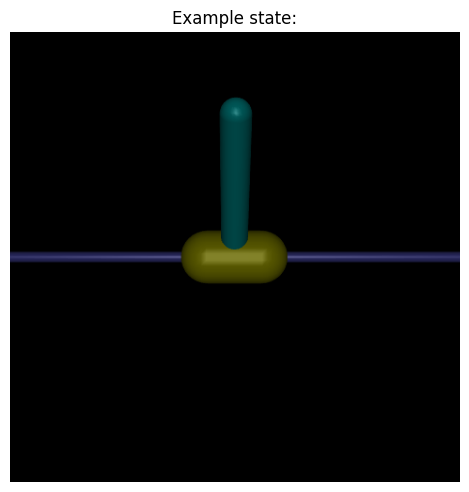

In [5]:
obs, info = env.reset()
render_notebook(env, 0, "Example state:")


Nice right?

### Random policy
Now you will try to implement a random policy: Uniformely chose a random action at each time step.

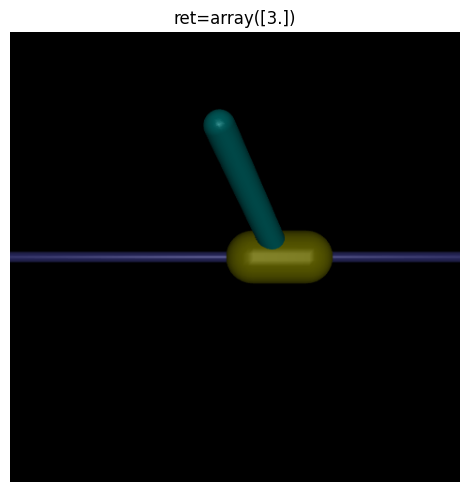

In [6]:
terminated = [False]
env.reset()
ret=0
while not all(terminated):
    action = np.random.uniform(-3, 3, size= env.action_space.shape)
    _,reward, terminated,truncated,info = env.step(action)
    terminated = terminated|truncated
    ret+=reward
    render_notebook(env,0,f"{ret=}")

### Other distribution
This policy is quite terrible, so let's try to improve it by using a gaussian distribution instead. Test several standard deviations and see which one works best

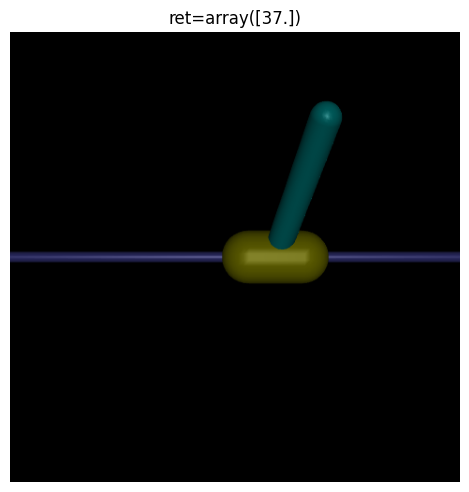

In [7]:

terminated = [False]
std = 0.1
env.reset()
ret=0
while not all(terminated):
    action = np.random.normal(0, std, size=env.action_space.shape)
    _,reward, terminated,truncated,info = env.step(action)
    terminated = terminated|truncated
    ret+=reward
    render_notebook(env,0,f"{ret=}")

This concludes this first part of the project, next week we will try to implement a feedback controler in this system. 
In the meantime, feel free to get more confortable with the documentation of gymnasium

### Feedback Policy

FeedBack Policy u=-Kx avec K a determiner

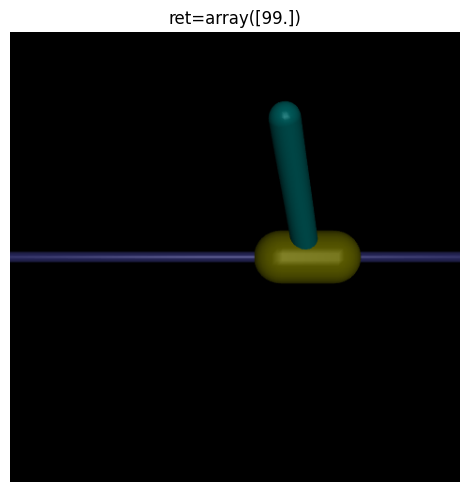

In [8]:
K = np.array([[1.0 , 2.0, 3.0, 4.0]]) 
terminated = [False]
env.reset()
ret=0
while not all(terminated):
    action = np.dot(K, obs.T)
    obs,reward, terminated,truncated,info = env.step(action)
    terminated = terminated|truncated
    ret+=reward
    render_notebook(env,0,f"{ret=}")
    

Random Search

In [9]:
def simulate(K):
    obs, info = env.reset()
    terminated = [False]
    ret = 0
    while not all(terminated):
        action = np.dot(K, obs[0])
        obs, reward, terminated, truncated, info = env.step([action])
        terminated = terminated | truncated
        ret += reward
    return ret

bret = -np.inf  
bK = None
num = 100000
for i in range(num):
    K_cand = np.random.uniform(low=-5, high=5, size=(
                                                     env.action_space.shape[1],
                                                     env.single_observation_space.shape[0]))
    cret = simulate(K_cand)
    if cret > bret:
        bret = cret
        bK = K_cand 
    if np.isclose(cret.item(), 1000.0):
        print(f"Iteration {i}: reward = {cret}, best reward = {bret}")
        break
    print(f"Iteration {i}: reward = {cret}, best reward = {bret}")

print(f"Best K found : {bK}", f"best Reward = {bret}")


Iteration 0: reward = [18.], best reward = [18.]
Iteration 1: reward = [25.], best reward = [25.]
Iteration 2: reward = [5.], best reward = [25.]
Iteration 3: reward = [15.], best reward = [25.]
Iteration 4: reward = [8.], best reward = [25.]
Iteration 5: reward = [45.], best reward = [45.]
Iteration 6: reward = [6.], best reward = [45.]
Iteration 7: reward = [20.], best reward = [45.]
Iteration 8: reward = [16.], best reward = [45.]
Iteration 9: reward = [12.], best reward = [45.]
Iteration 10: reward = [22.], best reward = [45.]
Iteration 11: reward = [32.], best reward = [45.]
Iteration 12: reward = [81.], best reward = [81.]
Iteration 13: reward = [27.], best reward = [81.]
Iteration 14: reward = [20.], best reward = [81.]
Iteration 15: reward = [5.], best reward = [81.]
Iteration 16: reward = [14.], best reward = [81.]
Iteration 17: reward = [6.], best reward = [81.]
Iteration 18: reward = [7.], best reward = [81.]
Iteration 19: reward = [30.], best reward = [81.]
Iteration 20: re

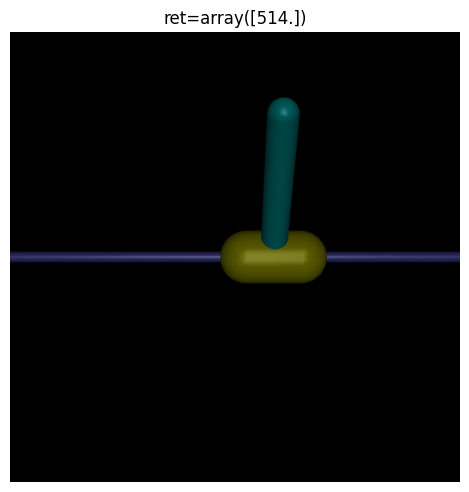

KeyboardInterrupt: 

In [10]:
obs, info = env.reset()
terminated = [False]
ret = 0

while not all(terminated):
    action = np.dot(bK, obs.T)
    obs, reward, terminated, truncated, info = env.step(action)
    print(obs)
    terminated = terminated | truncated
    ret += reward
    render_notebook(env, 0, f"{ret=}")

### Reinforcement learning (RL) Week 3 (test) Flo

In [ ]:
#policy : a= K s   => deterministic, linear, parameterized policy 
#grad compute with finite difference Not WORKING

def episode(K):
    obs, info = env.reset()
    terminated = [False]
    ret = 0.0
    while not all(terminated):
        action = -np.dot(K, obs[0])
        action = np.clip(action, -3.0, 3.0)
        obs, reward, terminated, truncated, info = env.step([action])
        terminated = terminated | truncated
        ret += float(reward[0]) 
        
    return ret


def compute_J(K, n_episodes=100):
    total = 0.0
    for i in range(n_episodes):
        total += episode(K)
    return total / n_episodes


def compute_gradJ(K, h=0.01):
    gradJ = np.zeros_like(K)
    for i in range(K.shape[0]):
        for j in range(K.shape[1]):
            K_plus = K.copy()
            K_minus = K.copy()

            K_plus[i, j]  += h
            K_minus[i, j] -= h

            r_plus  = compute_J(K_plus)
            r_minus = compute_J(K_minus)

            gradJ[i, j] = (r_plus - r_minus) / (2.0 * h)

    return gradJ


def training(a, iterations, h):
    K = np.random.uniform(low=-5, high=5, size=(env.action_space.shape[1],env.single_observation_space.shape[0]))
    #K = np.array([[-0.0, -4, -1, -2.3]]).reshape(env.action_space.shape[1],env.single_observation_space.shape[0])
    best_reward = -np.inf
    best_K = K.copy()
    iteration_reached = None
    target = 1000.0
    for i in range(iterations):
        gradJ = compute_gradJ(K, h=h)
        K = K + a * gradJ
        cret = compute_J(K)
        if cret > best_reward:
            best_reward = cret
            best_K = K.copy()
        print(f"Iteration {i}: reward = {cret:.2f}, best reward = {best_reward:.2f}")
        print(K)
        print(gradJ)
        if cret >= target:
            iteration_reached = i
            print(f">>> Cible de reward {target} atteinte à l'itération {i}.")
            break
    print(f"Best K found: {best_K}")
    print(f"Best reward: {best_reward:.2f}")

    return best_K, best_reward, iteration_reached



training(a=0.001, iterations=100000, h=0.00001)

Iteration 0: reward = 3.03, best reward = 3.03
[[ 36.91735269  18.95241673 -41.8947908  -13.00355617]]
[[ 38000.  22500. -40000. -12000.]]
Iteration 1: reward = 3.39, best reward = 3.39
[[ 32.41735269  17.95241673 -41.8947908  -15.00355617]]
[[-4500. -1000.     0. -2000.]]
Iteration 2: reward = 3.10, best reward = 3.39
[[ 33.41735269  12.45241673 -50.3947908  -17.00355617]]
[[ 1000. -5500. -8500. -2000.]]
Iteration 3: reward = 5.22, best reward = 5.22
[[ 37.41735269  15.45241673 -50.3947908  -21.50355617]]
[[ 4000.  3000.     0. -4500.]]
Iteration 4: reward = 16.81, best reward = 16.81
[[ 44.41735269  18.95241673 -63.8947908  -36.00355617]]
[[  7000.   3500. -13500. -14500.]]
Iteration 5: reward = 26.13, best reward = 26.13
[[ 37.41735269  -6.54758327 -40.8947908  -34.00355617]]
[[ -7000. -25500.  23000.   2000.]]
Iteration 6: reward = 2.29, best reward = 26.13
[[-44.08264731 -55.04758327 -85.3947908    0.99644383]]
[[-81500. -48500. -44500.  35000.]]
Iteration 7: reward = 2.30, best r

(array([[-18.08264731, -72.54758327, -30.3947908 , -21.00355617]]),
 1000.0,
 109)

In [ ]:
##RL linéaire
K = np.random.uniform(low=-3, high=3, size=(env.action_space.shape[1],env.single_observation_space.shape[0]))
gamma = 0.99
alpha = 0.01 
sigma = 0.5
bret = -np.inf  
bK = None

def policy(s):
    return np.random.normal(np.dot(K,s),sigma)

def compute_log_gradient(s, a):
    mu = np.dot(K, s)
    return ((a - mu) * s / sigma**2) 

for episode in range(5000):
    obs, info = env.reset()
    terminated = [False]
    ret = 0.0
    obss,actions,rewards=[],[],[]
    while not all(terminated):
        s = obs[0]
        action = policy(s)
        action = np.clip(action, -3.0, 3.0)
        next_obs, reward, terminated, truncated, info = env.step([action])
        terminated = terminated | truncated
        obss.append(s)
        actions.append(action)  
        rewards.append(reward)
        ret += reward
        obs = next_obs

    if ret >= bret:
        bret = ret 
        bK = K.copy()

    returns = np.zeros(len(rewards))
    G = 0
    for t in reversed(range(len(rewards))):
        G = rewards[t] + gamma * G
        returns[t] = G
    
    alpha = 0.0005 / (1 + 0.00005 * episode)
    
    for t in range(len(obss)):
        grad = compute_log_gradient(obss[t], actions[t])  
        K += alpha * grad * returns[t]  
    print(f"Episode {episode}, Total Reward: {ret}, Best Reward: {bret}, K:{K}" )
    
print(bK)

Episode 0, Total Reward: [3.], Best Reward: [3.], K:[[ 1.31299495  0.91324845 -0.75873285 -2.36668796]]
Episode 1, Total Reward: [3.], Best Reward: [3.], K:[[ 1.31297894  0.91318284 -0.75835057 -2.36754919]]
Episode 2, Total Reward: [4.], Best Reward: [4.], K:[[ 1.31290919  0.9133444  -0.76009653 -2.36359331]]
Episode 3, Total Reward: [3.], Best Reward: [4.], K:[[ 1.31288893  0.91341917 -0.76098664 -2.36160183]]
Episode 4, Total Reward: [4.], Best Reward: [4.], K:[[ 1.31286189  0.91339314 -0.76053278 -2.36268882]]
Episode 5, Total Reward: [5.], Best Reward: [5.], K:[[ 1.31284507  0.91340876 -0.76079835 -2.36205733]]
Episode 6, Total Reward: [4.], Best Reward: [5.], K:[[ 1.31286344  0.91337125 -0.7604382  -2.36294303]]
Episode 7, Total Reward: [3.], Best Reward: [5.], K:[[ 1.31287646  0.91337565 -0.75996628 -2.36395306]]
Episode 8, Total Reward: [5.], Best Reward: [5.], K:[[ 1.3127163   0.91361172 -0.76267993 -2.35783874]]
Episode 9, Total Reward: [4.], Best Reward: [5.], K:[[ 1.3126762

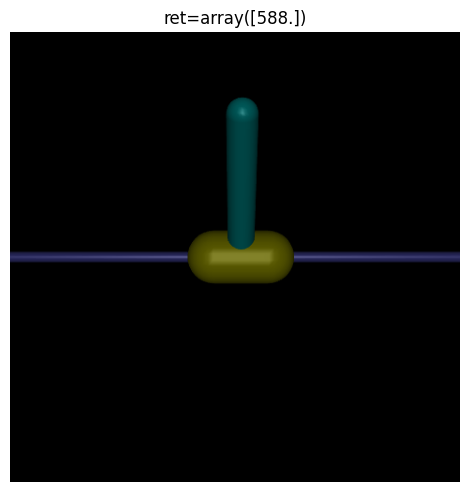

KeyboardInterrupt: 

: 

In [ ]:
obs, info = env.reset()
terminated = [False]
ret = 0

while not all(terminated):
    action = np.dot(bK, obs.T)
    obs, reward, terminated, truncated, info = env.step(action)
    terminated = terminated | truncated
    ret += reward
    render_notebook(env, 0, f"{ret=}")


In [ ]:
obs.T.shape

In [ ]:
bK.shape

##NON linear Policy using tanh version qui fonctionne

In [ ]:
K = np.random.uniform(low=-1, high=1, size=(env.action_space.shape[1],env.single_observation_space.shape[0]))
gamma = 0.99
sigma = 0.5
bret = -np.inf  
bK = None
alpha = 0.000005
patience = 200
cc=0
maxret=1000


def policy(s):
    return np.random.normal(env.single_action_space.high * np.tanh(np.dot(K, s)), sigma)

def compute_log_gradient(s, a):
    z  = np.dot(K, s)         
    mu = env.single_action_space.high * np.tanh(z)       #env.single_action_space.high = 3 for InvertedPendulum-v5
    return np.outer(((a - mu) * env.single_action_space.high * (1 - np.tanh(z)**2)) / sigma**2,s)
for episode in range(100000):
    obs, info = env.reset()
    terminated = [False]
    ret = 0.0
    obss,actions,rewards=[],[],[]
    while not all(terminated):
        s = obs[0]
        action = policy(s)
        action = np.clip(action, env.single_action_space.low, env.single_action_space.high)
        next_obs, reward, terminated, truncated, info = env.step([action])
        terminated = terminated | truncated
        obss.append(s)
        actions.append(action)  
        rewards.append(reward)
        ret += reward
        obs = next_obs

    if ret >= bret:
        bret = ret 
        bK = K.copy()

    returns = np.zeros(len(rewards))
    G = 0
    for t in reversed(range(len(rewards))):
        G = rewards[t] + gamma * G
        returns[t] = G
    
    for t in range(len(obss)):
        grad = compute_log_gradient(obss[t], actions[t])  
        K += alpha * grad * returns[t]
    print(f"Episode {episode}, Total Reward: {ret}, Best Reward: {bret}, K:{K}" )
    if ret>=maxret:
        cc+=1
    else:
        cc=0
    
    if cc>=patience:
        print(f"Early stopping: {patience} consecutive episodes with reward >= {maxret}")
        break
    

Episode 0, Total Reward: [6.], Best Reward: [6.], K:[[-0.05022459  0.7820557   0.73190269 -0.44277235]]
Episode 1, Total Reward: [3.], Best Reward: [6.], K:[[-0.05022382  0.78205562  0.73190809 -0.44278762]]
Episode 2, Total Reward: [4.], Best Reward: [6.], K:[[-0.05022237  0.78205352  0.7319208  -0.44281778]]
Episode 3, Total Reward: [6.], Best Reward: [6.], K:[[-0.05022218  0.78205374  0.73189615 -0.44276012]]
Episode 4, Total Reward: [4.], Best Reward: [6.], K:[[-0.05022284  0.78205461  0.73188358 -0.44273108]]
Episode 5, Total Reward: [4.], Best Reward: [6.], K:[[-0.05022247  0.78205375  0.7318747  -0.44271025]]
Episode 6, Total Reward: [4.], Best Reward: [6.], K:[[-0.05022273  0.78205428  0.7318581  -0.44267167]]
Episode 7, Total Reward: [5.], Best Reward: [6.], K:[[-0.05022521  0.78205814  0.73181861 -0.44258302]]
Episode 8, Total Reward: [4.], Best Reward: [6.], K:[[-0.05022617  0.78205989  0.73179347 -0.44252602]]
Episode 9, Total Reward: [4.], Best Reward: [6.], K:[[-0.0502262

KeyboardInterrupt: 

In [ ]:
obs, info = env.reset()
terminated = [False]
ret = 0

while not all(terminated):
    action = np.dot(K, obs.T)
    obs, reward, terminated, truncated, info = env.step(action)
    terminated = terminated | truncated
    ret += reward
    render_notebook(env, 0, f"{ret=}")

####NON linear Policy using tanh version qui fonctionne graphe etc pour ORAL


In [ ]:
state_dim = env.observation_space.shape[1]
action_dim = env.action_space.shape[1]

sigma=0.25
num_episodes=5000
gamma=0.99
alphas=[0.00001,0.0001,0.001]
number_of_runs=10

def policy(s):
    return np.random.normal(env.single_action_space.high * np.tanh(np.dot(theta, s)), sigma)

def compute_log_gradient(s, a):
    z  = np.dot(theta, s)         
    mu = env.single_action_space.high * np.tanh(z)      -
    return np.outer(((a - mu) * env.single_action_space.high * (1 - np.tanh(z)**2)) / sigma**2,s)

results_file = "saved_results_alpha.pkl"
overwrite_existing = True  

if os.path.exists(results_file) and not overwrite_existing:
    print("Loading previously saved results...")
    with open(results_file, "rb") as f:
        results = pickle.load(f)
else:
    print("Starting new experiment. Previous results will be replaced. Non linear")
    results = {alpha: [] for alpha in alphas}

    for alpha in alphas:
        print(f"\n=== Testing alpha = {alpha} ===")
        run_rewards = []
        for run in range(number_of_runs):
            print(f"\n  -> Run {run + 1}/{number_of_runs} (alpha={alpha})")
            time = 0
            theta = np.random.randn(action_dim, state_dim) * 0.1
            best_reward = -np.inf
            best_theta = None
            reward_each_episode = []

            for episode in range(num_episodes):
                obs, info = env.reset()
                state = obs[0]
                trajectory = []
                total_reward = 0
                done = False
                while not done:
                    action = policy(state)
                    next_state, reward, done, truncated, _ = env.step([action])
                    done = done or truncated
                    trajectory.append((state, action, reward))
                    total_reward += reward
                    state = next_state[0]

                if total_reward == best_reward:
                    time += 1
                else:
                    time = 0

                if time >= 100:
                    break

                if total_reward > best_reward:
                    best_reward = total_reward
                    best_theta = theta

                returns = np.zeros(len(trajectory))
                G = 0
                for t in reversed(range(len(trajectory))):
                    G = trajectory[t][2] + gamma * G
                    returns[t] = G

                for t, (state, action, _) in enumerate(trajectory):
                    grad = compute_log_gradient(state, action)
                    theta += alpha * grad * returns[t]

                reward_each_episode.append(total_reward)

            run_rewards.append(reward_each_episode)
            print(f"  -> Run {run + 1} finished. Best Reward: {best_reward}")

        results[alpha] = run_rewards
        print(f"=== Finished testing alpha = {alpha} ===\n")

    # Save results
    with open(results_file, "wb") as f:
        pickle.dump(results, f)
    print(f"Results saved to {results_file}")
    


Starting new experiment. Previous results will be replaced. Non linear

=== Testing alpha = 1e-05 ===

  -> Run 1/10 (alpha=1e-05)


KeyboardInterrupt: 

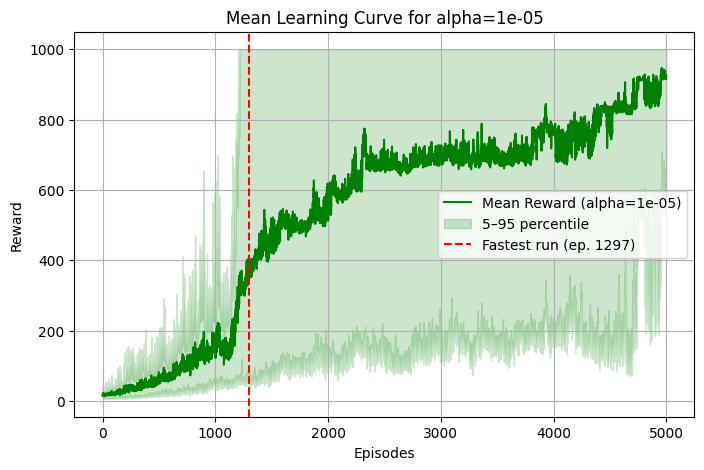

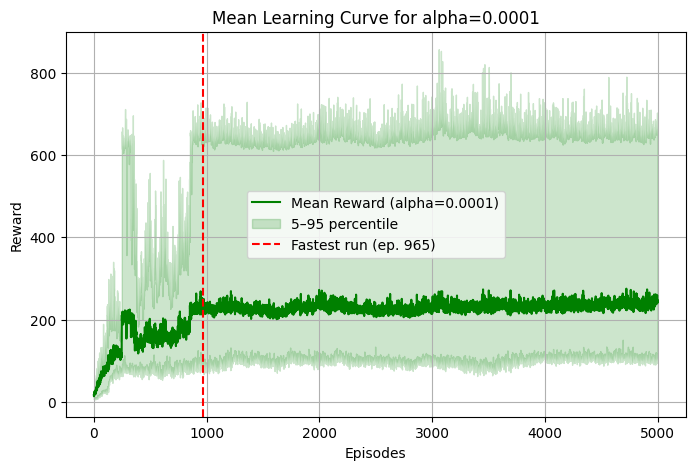

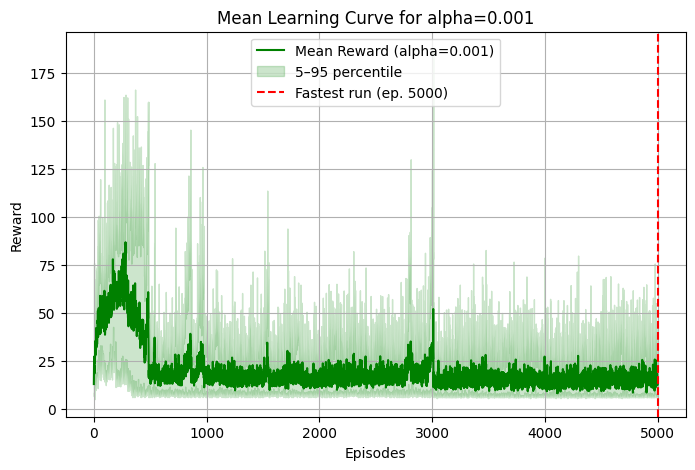

In [ ]:
with open("saved_results_alpha.pkl", "rb") as f:
        results = pickle.load(f)
for alpha in results:
    if not results.get(alpha) or len(results[alpha]) == 0:
        print(f"Skipping action_std={alpha} (no runs available)")
        continue

    plt.figure(figsize=(8, 5))
    max_len = max(len(run) for run in results[alpha])
    min_len = min(len(run) for run in results[alpha])
    fastest_run_idx = [i for i, run in enumerate(results[alpha]) if len(run) == min_len][0]

    padded_runs = []
    for run_rewards in results[alpha]:
        run_rewards = np.array(run_rewards).flatten()
        pad_length = max_len - len(run_rewards)
        if pad_length > 0:
            padded = np.concatenate([run_rewards, np.full(pad_length, 1000.0)])
        else:
            padded = run_rewards
        padded_runs.append(padded)

    all_runs = np.stack(padded_runs)

    mean_rewards = np.mean(all_runs,axis=0)
    lower_percentile = np.percentile(all_runs, 5, axis=0)
    upper_percentile = np.percentile(all_runs,95, axis=0)

    episodes = np.arange(len(mean_rewards))
    plt.plot(episodes, mean_rewards, label=f"Mean Reward (alpha={alpha})", color="green")
    plt.fill_between(episodes, lower_percentile, upper_percentile, alpha=0.2, color="green", label="5–95 percentile")
    plt.axvline(x=min_len, color="red", linestyle="--", linewidth=1.5, label=f"Fastest run (ep. {min_len})")

    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title(f"Mean Learning Curve for alpha={alpha}")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"mean_curve_alpha_{alpha}.png")
    plt.show()

In [ ]:
state_dim = env.observation_space.shape[1]
action_dim = env.action_space.shape[1]

action_stds=[0.2,0.3,0.4]
num_episodes=5000
gamma=0.99
alpha=0.0001
number_of_runs=10

def policy(s):
    return np.random.normal(env.single_action_space.high * np.tanh(np.dot(theta, s)), action_std)

def compute_log_gradient(s, a):
    z  = np.dot(theta, s)         
    mu = env.single_action_space.high * np.tanh(z)       #env.single_action_space.high = 3 for InvertedPendulum-v5
    return np.outer(((a - mu) * env.single_action_space.high * (1 - np.tanh(z)**2)) / action_std**2,s)

results_file = "saved_results_actionstd.pkl"
overwrite_existing = True  

if os.path.exists(results_file) and not overwrite_existing:
    print("Loading previously saved results...")
    with open(results_file, "rb") as f:
        results = pickle.load(f)
else:
    print("Starting new experiment. Previous results will be replaced. Non linear")
    results = {action_std: [] for action_std in action_stds}

    for action_std in action_stds:
        print(f"\n=== Testing action_std = {action_std} ===")
        run_rewards = []
        for run in range(number_of_runs):
            print(f"\n  -> Run {run + 1}/{number_of_runs} (action_std={action_std})")
            time = 0
            theta = np.random.randn(action_dim, state_dim) * 0.1
            best_reward = -np.inf
            best_theta = None
            reward_each_episode = []

            for episode in range(num_episodes):
                obs, info = env.reset()
                state = obs[0]
                trajectory = []
                total_reward = 0
                done = False
                while not done:
                    action = policy(state)
                    next_state, reward, done, truncated, _ = env.step([action])
                    done = done or truncated
                    trajectory.append((state, action, reward))
                    total_reward += reward
                    state = next_state[0]

                if total_reward == best_reward:
                    time += 1
                else:
                    time = 0

                if time >= 100:
                    break

                if total_reward > best_reward:
                    best_reward = total_reward
                    best_theta = theta

                returns = np.zeros(len(trajectory))
                G = 0
                for t in reversed(range(len(trajectory))):
                    G = trajectory[t][2] + gamma * G
                    returns[t] = G

                for t, (state, action, _) in enumerate(trajectory):
                    grad = compute_log_gradient(state, action)
                    theta += alpha * grad * returns[t]

                reward_each_episode.append(total_reward)

            run_rewards.append(reward_each_episode)
            print(f"  -> Run {run + 1} finished. Best Reward: {best_reward}")

        results[action_std] = run_rewards
        print(f"=== Finished testing std = {action_std} ===\n")

    # Save results
    with open(results_file, "wb") as f:
        pickle.dump(results, f)
    print(f"Results saved to {results_file}")


Starting new experiment. Previous results will be replaced. Non linear

=== Testing action_std = 0.2 ===

  -> Run 1/10 (action_std=0.2)


/var/folders/nx/v5kfjhrx1n5g9q56qrsnwz9h0000gn/T/ipykernel_5197/3242358210.py:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  returns[t] = G


KeyboardInterrupt: 

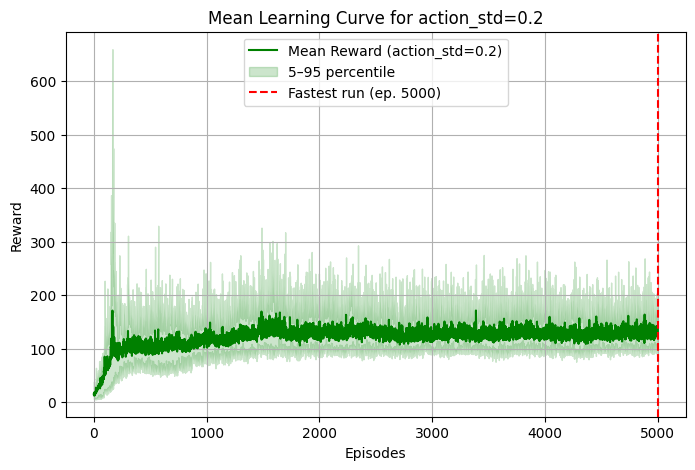

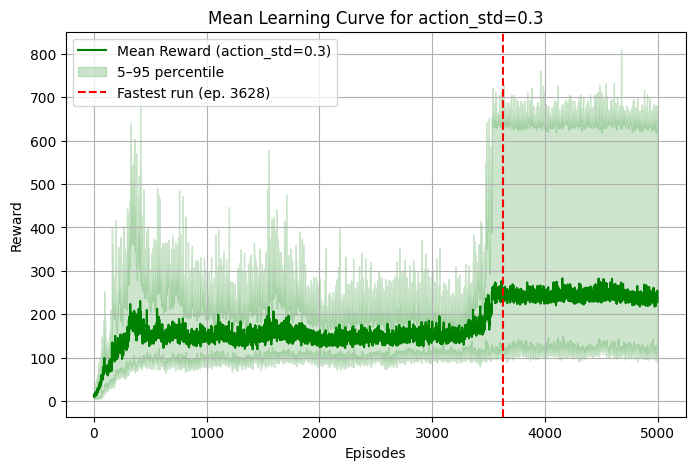

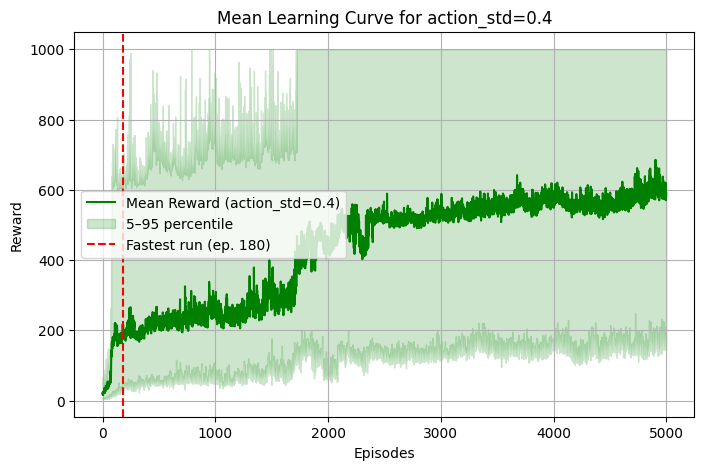

In [ ]:
with open("saved_results_actionstd.pkl", "rb") as f:
        results = pickle.load(f)


for action_std in results:
    if not results.get(action_std) or len(results[action_std]) == 0:
        print(f"Skipping action_std={action_std} (no runs available)")
        continue

    plt.figure(figsize=(8, 5))

    max_len = max(len(run) for run in results[action_std])
    min_len = min(len(run) for run in results[action_std])
    fastest_run_idx = [i for i, run in enumerate(results[action_std]) if len(run) == min_len][0]

    padded_runs = []
    for run_rewards in results[action_std]:
        run_rewards = np.array(run_rewards).flatten()
        pad_length = max_len - len(run_rewards)
        if pad_length > 0:
            padded = np.concatenate([run_rewards, np.full(pad_length, 1000.0)])
        else:
            padded = run_rewards
        padded_runs.append(padded)

    all_runs = np.stack(padded_runs)

    mean_rewards = np.mean(all_runs,axis=0)
    lower_percentile = np.percentile(all_runs, 5, axis=0)
    upper_percentile = np.percentile(all_runs,95, axis=0)

    episodes = np.arange(len(mean_rewards))
    plt.plot(episodes, mean_rewards, label=f"Mean Reward (action_std={action_std})", color="green")
    plt.fill_between(episodes, lower_percentile, upper_percentile, alpha=0.2, color="green", label="5–95 percentile")
    plt.axvline(x=min_len, color="red", linestyle="--", linewidth=1.5, label=f"Fastest run (ep. {min_len})")

    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title(f"Mean Learning Curve for action_std={action_std}")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"mean_curve_action_std_{action_std}.png")
    plt.show()

### Reinforcement learning (RL) Week 3 (test) Selim

 One run

In [ ]:
state_dim = env.observation_space.shape[1]
action_dim = env.action_space.shape[1]

theta = np.random.randn(action_dim,state_dim)*0.1
best_reward = -np.inf
best_theta = None
action_std=0.25
num_episodes=5000
gamma=0.99
time = 0

def policy(state):
    mean = np.dot(theta,state)
    action=np.random.normal(mean, action_std)
    return action

def compute_log_gradient(state, action):
    mean = np.dot(theta, state)
    log_gradient = np.outer((action - mean), state) / action_std**2
    return log_gradient

gradient_norms = []
reward_each_episode=[]
for episode in range(num_episodes):
    obs, info = env.reset()
    state = obs[0]
    trajectory = [] 
    total_reward = 0
    done = False
    while not done:
        action = policy(state)
        print(action)
        next_state, reward, done, truncated, _ = env.step([action])
        done = done or truncated
        trajectory.append((state, action, reward))  
        total_reward += reward
        state = next_state[0]

    if total_reward == best_reward:
        time += 1  
    else:
        time = 0  

    if time >= 20:  
        break
    
    if total_reward > best_reward:  
        best_reward = total_reward
        best_theta = theta  

    returns = np.zeros(len(trajectory))
    G = 0
    for t in reversed(range(len(trajectory))):
        G = trajectory[t][2] + gamma * G 
        returns[t] = G
    
    alpha = 0.001
    for t, (state, action, _) in enumerate(trajectory):
        grad = compute_log_gradient(state, action)
        theta += alpha * grad * returns[t]
        
        grad_norm = 0
        grad_norm = np.linalg.norm(grad) 
        gradient_norms.append(grad_norm)  
    print(theta)     
    reward_each_episode.append(total_reward)
    print(f"Episode {episode}, Total Reward: {total_reward}, Best Reward: {best_reward}")

theta = best_theta
np.save('trained_theta.npy', theta)

In [ ]:
theta = np.load('trained_theta.npy')
obs, info = env.reset()
terminated = [False]
ret = 0
while not all(terminated):
    state=obs[0]
    action = np.clip(np.dot(theta,state), env.action_space.low, env.action_space.high)  # Get action from the trained policy
    obs, reward, terminated, truncated, info = env.step(action)
    terminated = terminated | truncated
    ret += reward
    render_notebook(env, 0, f"{ret=}")

Alpha plot

In [ ]:
state_dim = env.observation_space.shape[1]
action_dim = env.action_space.shape[1]

action_std=0.25
num_episodes=5000
gamma=0.99
alphas=[0.00001,0.0001,0.001]
number_of_runs=10

def policy(state):
    mean = np.dot(theta,state)
    action=np.random.normal(mean, action_std)
    return action

def compute_log_gradient(state, action): 
    mean = np.dot(theta, state)
    log_gradient = np.outer((action - mean), state) / action_std**2
    return log_gradient

results_file = "saved_results_alpha.pkl"
overwrite_existing = True  
if os.path.exists(results_file) and not overwrite_existing:
    print("Loading previously saved results...")
    with open(results_file, "rb") as f:
        results = pickle.load(f)
else:
    print("Starting new experiment. Previous results will be replaced.")
    results = {alpha: [] for alpha in alphas}

    for alpha in alphas:
        print(f"\n=== Testing alpha = {alpha} ===")
        run_rewards = []
        for run in range(number_of_runs):
            print(f"\n  -> Run {run + 1}/{number_of_runs} (alpha={alpha})")
            time = 0
            theta = np.random.randn(action_dim, state_dim) * 0.1
            best_reward = -np.inf
            best_theta = None
            reward_each_episode = []

            for episode in range(num_episodes):
                obs, info = env.reset()
                state = obs[0]
                trajectory = []
                total_reward = 0
                done = False
                while not done:
                    action = policy(state)
                    next_state, reward, done, truncated, _ = env.step([action])
                    done = done or truncated
                    trajectory.append((state, action, reward))
                    total_reward += reward
                    state = next_state[0]

                if total_reward == best_reward:
                    time += 1
                else:
                    time = 0

                if time >= 100:
                    break

                if total_reward > best_reward:
                    best_reward = total_reward
                    best_theta = theta

                returns = np.zeros(len(trajectory))
                G = 0
                for t in reversed(range(len(trajectory))):
                    G = trajectory[t][2] + gamma * G
                    returns[t] = G

                for t, (state, action, _) in enumerate(trajectory):
                    grad = compute_log_gradient(state, action)
                    theta += alpha * grad * returns[t]

                reward_each_episode.append(total_reward)

            run_rewards.append(reward_each_episode)
            print(f"  -> Run {run + 1} finished. Best Reward: {best_reward}")

        results[alpha] = run_rewards
        print(f"=== Finished testing alpha = {alpha} ===\n")

    # Save results
    with open(results_file, "wb") as f:
        pickle.dump(results, f)
    print(f"Results saved to {results_file}")


Starting new experiment. Previous results will be replaced.

=== Testing alpha = 1e-05 ===

  -> Run 1/10 (alpha=1e-05)
  -> Run 1 finished. Best Reward: [283.]

  -> Run 2/10 (alpha=1e-05)
  -> Run 2 finished. Best Reward: [123.]

  -> Run 3/10 (alpha=1e-05)
  -> Run 3 finished. Best Reward: [371.]

  -> Run 4/10 (alpha=1e-05)
  -> Run 4 finished. Best Reward: [247.]

  -> Run 5/10 (alpha=1e-05)
  -> Run 5 finished. Best Reward: [216.]

  -> Run 6/10 (alpha=1e-05)
  -> Run 6 finished. Best Reward: [511.]

  -> Run 7/10 (alpha=1e-05)
  -> Run 7 finished. Best Reward: [111.]

  -> Run 8/10 (alpha=1e-05)
  -> Run 8 finished. Best Reward: [799.]

  -> Run 9/10 (alpha=1e-05)
  -> Run 9 finished. Best Reward: [340.]

  -> Run 10/10 (alpha=1e-05)
  -> Run 10 finished. Best Reward: [271.]
=== Finished testing alpha = 1e-05 ===


=== Testing alpha = 0.0001 ===

  -> Run 1/10 (alpha=0.0001)
  -> Run 1 finished. Best Reward: [1000.]

  -> Run 2/10 (alpha=0.0001)
  -> Run 2 finished. Best Reward:

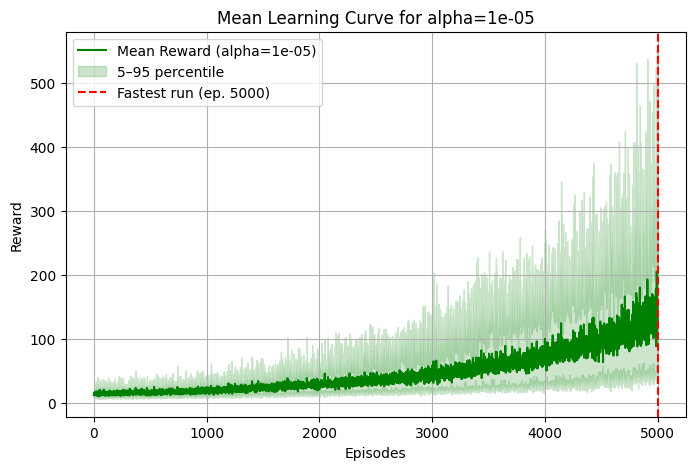

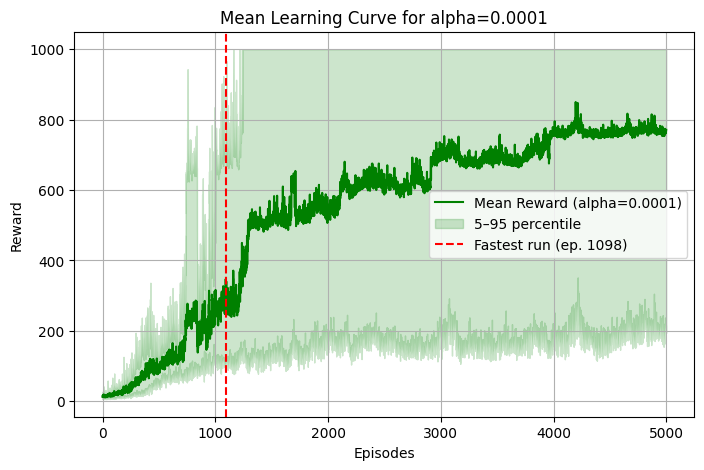

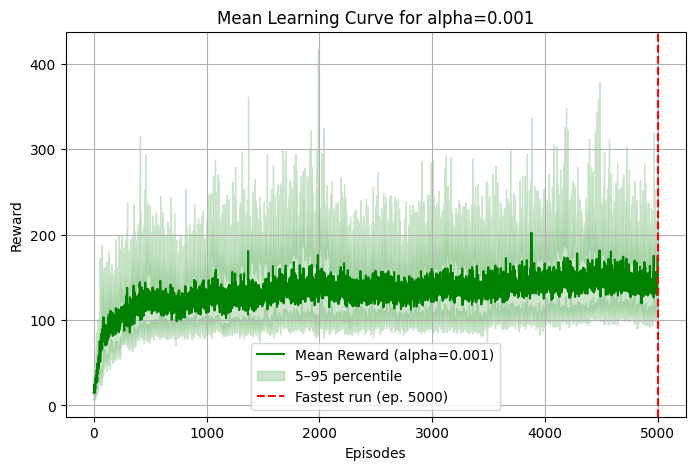

In [ ]:
with open("saved_results_alpha.pkl", "rb") as f:
        results = pickle.load(f)

for alpha in results:
    if not results.get(alpha) or len(results[alpha]) == 0:
        print(f"Skipping action_std={alpha} (no runs available)")
        continue

    plt.figure(figsize=(8, 5))
    max_len = max(len(run) for run in results[alpha])
    min_len = min(len(run) for run in results[alpha])
    fastest_run_idx = [i for i, run in enumerate(results[alpha]) if len(run) == min_len][0]

    padded_runs = []
    for run_rewards in results[alpha]:
        run_rewards = np.array(run_rewards).flatten()
        pad_length = max_len - len(run_rewards)
        if pad_length > 0:
            padded = np.concatenate([run_rewards, np.full(pad_length, 1000.0)])
        else:
            padded = run_rewards
        padded_runs.append(padded)

    all_runs = np.stack(padded_runs)

    mean_rewards = np.mean(all_runs,axis=0)
    lower_percentile = np.percentile(all_runs, 5, axis=0)
    upper_percentile = np.percentile(all_runs,95, axis=0)

    episodes = np.arange(len(mean_rewards))
    plt.plot(episodes, mean_rewards, label=f"Mean Reward (alpha={alpha})", color="green")
    plt.fill_between(episodes, lower_percentile, upper_percentile, alpha=0.2, color="green", label="5–95 percentile")
    plt.axvline(x=min_len, color="red", linestyle="--", linewidth=1.5, label=f"Fastest run (ep. {min_len})")

    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title(f"Mean Learning Curve for alpha={alpha}")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"mean_curve_alpha_{alpha}.png")
    plt.show()

Action std plot

In [ ]:
state_dim = env.observation_space.shape[1]
action_dim = env.action_space.shape[1]

action_stds=[0.2,0.3,0.4]
num_episodes=5000
gamma=0.99
alpha=0.0001
number_of_runs=10

def policy(state):
    mean = np.dot(theta,state)
    action=np.random.normal(mean, action_std)
    return action

def compute_log_gradient(state, action): 
    mean = np.dot(theta, state)
    log_gradient = np.outer((action - mean), state) / action_std**2
    return log_gradient

results_file = "saved_results_actionstd.pkl"
overwrite_existing = True  
if os.path.exists(results_file) and not overwrite_existing:
    print("Loading previously saved results...")
    with open(results_file, "rb") as f:
        results = pickle.load(f)
else:
    print("Starting new experiment. Previous results will be replaced.")
    results = {action_std: [] for action_std in action_stds}

    for action_std in action_stds:
        print(f"\n=== Testing action_std = {action_std} ===")
        run_rewards = []
        for run in range(number_of_runs):
            print(f"\n  -> Run {run + 1}/{number_of_runs} (action_std={action_std})")
            time = 0
            theta = np.random.randn(action_dim, state_dim) * 0.1
            best_reward = -np.inf
            best_theta = None
            reward_each_episode = []

            for episode in range(num_episodes):
                obs, info = env.reset()
                state = obs[0]
                trajectory = []
                total_reward = 0
                done = False
                while not done:
                    action = policy(state)
                    next_state, reward, done, truncated, _ = env.step([action])
                    done = done or truncated
                    trajectory.append((state, action, reward))
                    total_reward += reward
                    state = next_state[0]

                if total_reward == best_reward:
                    time += 1
                else:
                    time = 0

                if time >= 100:
                    break

                if total_reward > best_reward:
                    best_reward = total_reward
                    best_theta = theta

                returns = np.zeros(len(trajectory))
                G = 0
                for t in reversed(range(len(trajectory))):
                    G = trajectory[t][2] + gamma * G
                    returns[t] = G

                for t, (state, action, _) in enumerate(trajectory):
                    grad = compute_log_gradient(state, action)
                    theta += alpha * grad * returns[t]

                reward_each_episode.append(total_reward)

            run_rewards.append(reward_each_episode)
            print(f"  -> Run {run + 1} finished. Best Reward: {best_reward}")

        results[action_std] = run_rewards
        print(f"=== Finished testing std = {action_std} ===\n")

    with open(results_file, "wb") as f:
        pickle.dump(results, f)
    print(f"Results saved to {results_file}")


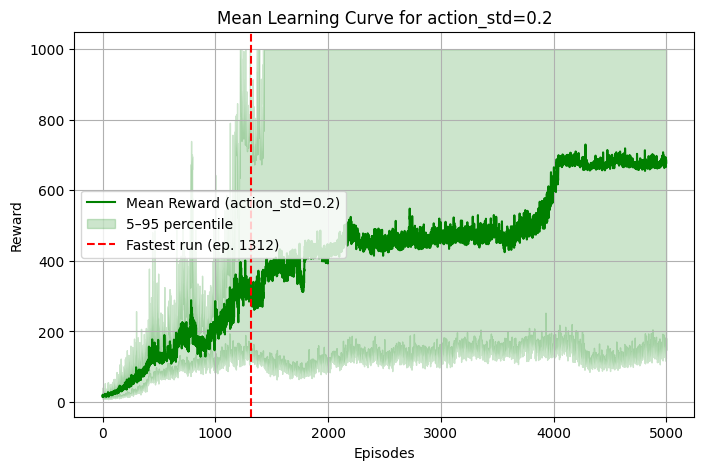

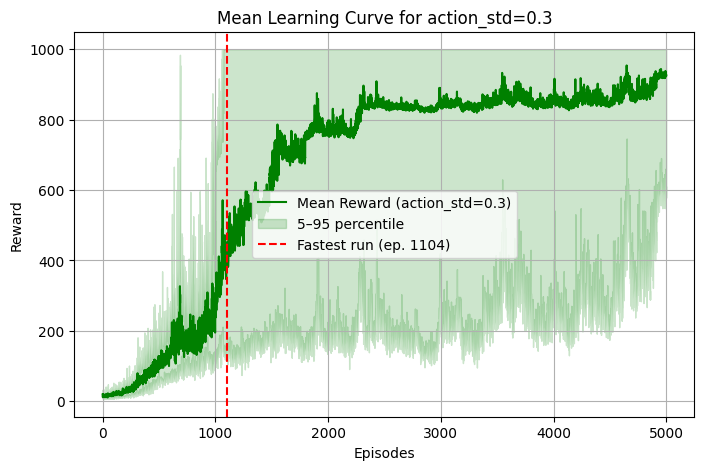

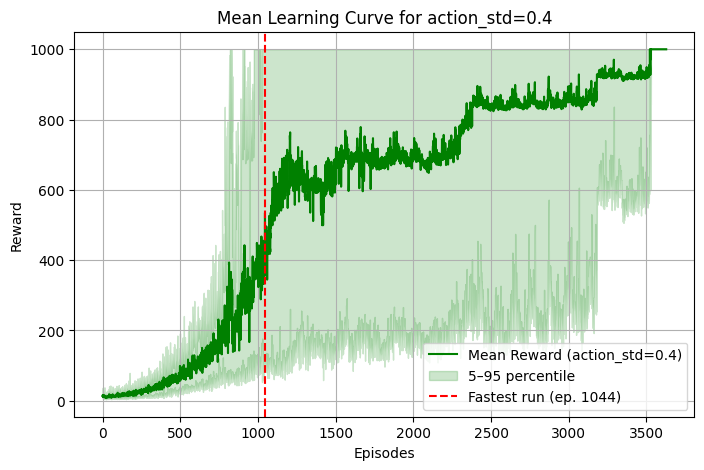

In [ ]:

with open("saved_results_actionstd.pkl", "rb") as f:
        results = pickle.load(f)


for action_std in results:
    if not results.get(action_std) or len(results[action_std]) == 0:
        print(f"Skipping action_std={action_std} (no runs available)")
        continue

    plt.figure(figsize=(8, 5))

    max_len = max(len(run) for run in results[action_std])
    min_len = min(len(run) for run in results[action_std])
    fastest_run_idx = [i for i, run in enumerate(results[action_std]) if len(run) == min_len][0]

    padded_runs = []
    for run_rewards in results[action_std]:
        run_rewards = np.array(run_rewards).flatten()
        pad_length = max_len - len(run_rewards)
        if pad_length > 0:
            padded = np.concatenate([run_rewards, np.full(pad_length, 1000.0)])
        else:
            padded = run_rewards
        padded_runs.append(padded)

    all_runs = np.stack(padded_runs)

    mean_rewards = np.mean(all_runs,axis=0)
    lower_percentile = np.percentile(all_runs, 5, axis=0)
    upper_percentile = np.percentile(all_runs,95, axis=0)

    episodes = np.arange(len(mean_rewards))
    plt.plot(episodes, mean_rewards, label=f"Mean Reward (action_std={action_std})", color="green")
    plt.fill_between(episodes, lower_percentile, upper_percentile, alpha=0.2, color="green", label="5–95 percentile")
    plt.axvline(x=min_len, color="red", linestyle="--", linewidth=1.5, label=f"Fastest run (ep. {min_len})")

    plt.xlabel("Episodes")
    plt.ylabel("Reward")
    plt.title(f"Mean Learning Curve for action_std={action_std}")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"mean_curve_action_std_{action_std}.png")
    plt.show()



### LQR Loi optimale mais instable 

In [ ]:
from scipy.linalg import solve_discrete_are

def solve_discounted_lqr(A, B, Q, R, gamma, max_iter=10000, tol=1e-10):
    n = A.shape[0]
    P = Q.copy()
    for _ in range(max_iter):
        S = R + gamma*(B.T @ P @ B)
        S_inv = np.linalg.inv(S)
        P_next = Q + gamma*(A.T @ P @ A) \
               - gamma**2 * (A.T @ P @ B) @ S_inv @ (B.T @ P @ A)
        if np.linalg.norm(P_next - P) < tol:
            P = P_next
            break
        P = P_next

    S = R + gamma*(B.T @ P @ B)
    S_inv = np.linalg.inv(S)
    K = -S_inv @ (gamma * B.T @ P @ A)
    return P, K

def solve_lqr_classic(A, B, Q, R):

    P = solve_discrete_are(A, B, Q, R)
    
    S_inv = np.linalg.inv(R + B.T @ P @ B)
    K = -S_inv @ (B.T @ P @ A)
    
    return P, K


In [ ]:
#A and B given

A= np.array([[ 1.00000000e+00, -2.35296084e-03,  3.99338571e-02, 1.21166283e-04],
             [-1.38777878e-16,  1.02354968e+00,  1.52695351e-04, 3.87872361e-02],
             [ 1.19739288e-15, -1.16537817e-01,  9.96701460e-01, 5.20975868e-03],
             [-5.46784840e-15,  1.16687611e+00,  7.56271952e-03, 9.47825276e-01]])
B = np.array([[ 0.00664611],
              [-0.01530383],
              [ 0.33142047],
              [-0.7575789 ]])

Q = np.diag([1.0, 1.0, 1000.0, 1.0])
R = np.array([[0.1]])
#A = np.array([[2]])
#B = np.array([[1]])
#Q = np.array([[1]])
#R = np.array([[1]])
found_controller = False
for gamma in np.arange(1, 0, -0.01):
    P_sol, K_sol = solve_discounted_lqr(A, B, Q, R, gamma)
    A_cl = A + B @ K_sol 
    eigvals, _ = np.linalg.eig(A_cl)
    spectral_radius = np.max(np.abs(eigvals))
    print(f"gamma = {gamma:.4f} | Spectral Radius = {spectral_radius:.4f}")
    if spectral_radius > 1.0:
        print(f"Succes : For gamma = {gamma:.4f}, closed-loop system unstable (spectral radius = {spectral_radius:.4f}).")
        found_controller = True
        break

if not found_controller:
    print("No controller found with eigenvalues > 1 in the gamma interval [0,1].")

obs, info = env.reset()
terminated = [False]
ret = 0
while not all(terminated):
    action = np.dot(K_sol, obs.T)
    action = np.clip(action, env.action_space.low, env.action_space.high)
    obs, reward, terminated, truncated, info = env.step(action)
    terminated = terminated | truncated
    ret += reward
print(f"Reward total dans l'environnement : {ret}")


P,K=solve_lqr_classic(A, B, Q, R)
print("K LQR =", K)

obs, info = env.reset()
terminated = [False]
ret = 0
while not all(terminated):
    action = np.dot(K, obs.T)
    action = np.clip(action, env.action_space.low, env.action_space.high)
    obs, reward, terminated, truncated, info = env.step(action)
    terminated = terminated | truncated
    ret += reward
print(f"Reward total dans l'environnement : {ret}")

gamma = 1.0000 | Spectral Radius = 0.9987
gamma = 0.9900 | Spectral Radius = 0.9998
gamma = 0.9800 | Spectral Radius = 0.9999
gamma = 0.9700 | Spectral Radius = 0.9999
gamma = 0.9600 | Spectral Radius = 1.0000
gamma = 0.9500 | Spectral Radius = 1.0000
gamma = 0.9400 | Spectral Radius = 1.0000
gamma = 0.9300 | Spectral Radius = 1.0000
gamma = 0.9200 | Spectral Radius = 1.0000
gamma = 0.9100 | Spectral Radius = 1.0000
gamma = 0.9000 | Spectral Radius = 1.0000
gamma = 0.8900 | Spectral Radius = 1.0000
gamma = 0.8800 | Spectral Radius = 1.0000
gamma = 0.8700 | Spectral Radius = 1.0000
gamma = 0.8600 | Spectral Radius = 1.0000
gamma = 0.8500 | Spectral Radius = 1.0000
gamma = 0.8400 | Spectral Radius = 1.0100
Succes : For gamma = 0.8400, closed-loop system unstable (spectral radius = 1.0100).
Reward total dans l'environnement : [198.]
K LQR = [[ 0.08063669 14.91104353  2.60284934  2.58084638]]
Reward total dans l'environnement : [1000.]


In [ ]:
A= np.array([[ 1.00000000e+00, -2.35296084e-03,  3.99338571e-02, 1.21166283e-04],
             [-1.38777878e-16,  1.02354968e+00,  1.52695351e-04, 3.87872361e-02],
             [ 1.19739288e-15, -1.16537817e-01,  9.96701460e-01, 5.20975868e-03],
             [-5.46784840e-15,  1.16687611e+00,  7.56271952e-03, 9.47825276e-01]])
B = np.array([[ 0.00664611],
              [-0.01530383],
              [ 0.33142047],
              [-0.7575789 ]])

Q = np.diag([1.0, 1.0, 1000.0, 1.0])
R = np.array([[0.1]])
P_sol, K_sol = solve_lqr_classic(A, B, Q, R)
print("P matrix:\n", P_sol)
print("K gain:\n", K_sol)

A_cl = A + B @ K_sol 
eigvals, _ = np.linalg.eig(A_cl)
print("closed-loop eigenvalues:\n", eigvals)

spectral_radius = np.max(np.abs(eigvals))
print(f"Spectral Radius = {spectral_radius}")
if spectral_radius < 1.0:
    print("=> stable")
else:
    print("=> unstable.")

obs, info = env.reset()
terminated = [False]
ret = 0
while not all(terminated):
    action = np.dot(K_sol, obs.T) 
    action = np.clip(action, env.action_space.low, env.action_space.high)
    obs, reward, terminated, truncated, info = env.step(action)
    terminated = terminated | truncated
    ret += reward
print(f"Total reward in env: {ret}")
# We get something stable localy stable (ie spectral radius of closed systems <1) but when we launch the env it's unstable after approx 25 iterations.
# The discount create a myopic controller, it does not stabilize the system globally (for 1000 iterations) but it stabilizes it for the launch (for the first iterations)


Meilleur spectral radius : 0.8250033851915141
Q optimale : [2.20486559e+02 3.20875183e+01 1.39837323e-02 1.05490494e+00]
R optimal : 0.0026302964925653885
Gain K : [[14.25214748 31.67422986  9.35054151  5.57251251]]


In [ ]:

A = np.array([[ 1.00000000e+00, -2.35296084e-03,  3.99338571e-02, 1.21166283e-04],
              [-1.38777878e-16,  1.02354968e+00,  1.52695351e-04, 3.87872361e-02],
              [ 1.19739288e-15, -1.16537817e-01,  9.96701460e-01, 5.20975868e-03],
              [-5.46784840e-15,  1.16687611e+00,  7.56271952e-03, 9.47825276e-01]])
B = np.array([[ 0.00664611],
              [-0.01530383],
              [ 0.33142047],
              [-0.7575789 ]])

def optimize_lqr(A, B, n_iters=100000000000, q_bounds=(1e-2, 1e4), r_bounds=(1e-3, 1e2)):
    best = {'rho': np.inf}
    for _ in range(n_iters):
        qs = np.exp(np.random.uniform(np.log(q_bounds[0]), np.log(q_bounds[1]), size=4))
        R_val = np.exp(np.random.uniform(np.log(r_bounds[0]), np.log(r_bounds[1])))
        Q = np.diag(qs)
        R = np.array([[R_val]])
        P, K = solve_lqr_classic(A, B, Q, R)
        Acl = A + B @ K
        rho = np.max(np.abs(eigvals(Acl)))
        if rho < best['rho']:
            best.update(rho=rho, Q=Q, R=R, P=P, K=K)
    return best

if __name__ == "__main__":
    result = optimize_lqr(A, B, n_iters=2000)
    print("Meilleur spectral radius :", result['rho'])
    print("Q optimale :", np.diag(result['Q']))
    print("R optimal :", result['R'][0,0])
    print("Gain K :", result['K'])

Meilleur spectral radius : 0.8164031080486828
Q optimale : [2.43171385e+02 1.07554337e+01 2.20649238e+00 1.60717389e-01]
R optimal : 9.680948473140326
Gain K : [[ 3.45806266 11.18225925  2.63319164  1.91393753]]


In [ ]:
import gymnasium as gym
import numpy as np


env = gym.make(
    "InvertedPendulum-v5",
    render_mode="rgb_array"   

from gymnasium.wrappers import RecordVideo
env = RecordVideo(
    env,
    video_folder="videosPROJETBachelor24",               
    episode_trigger=lambda idx: True,    
    name_prefix="pendulumVFLQR"     
)

obs, info = env.reset()
K = result['K']
print(K)
ret, terminated, truncated = 0.0, False, False

while not (terminated or truncated):
    action = K.dot(obs.T).T
    obs, reward, terminated, truncated, info = env.step(action)
    ret += reward
    env.render()

print("Return final :", ret)
env.close()




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /Users/florian/Robotics_RL_Projet/videosPROJETBachelor24 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


[[ 3.45806266 11.18225925  2.63319164  1.91393753]]
Return final : 1000.0


: 

In [ ]:
import gymnasium as gym
import numpy as np

env = gym.make(
    "InvertedPendulum-v5",
    render_mode="rgb_array"  
)

from gymnasium.wrappers import RecordVideo
env = RecordVideo(
    env,
    video_folder="videosPROJETBachelor1",               
    episode_trigger=lambda idx: True,   
    name_prefix="inverted_pendulum1"      
)

obs, info = env.reset()
K = K_sol
print(K)
ret, terminated, truncated = 0.0, False, False

while not (terminated or truncated):
    action = K.dot(obs.T).T
    obs, reward, terminated, truncated, info = env.step(action)
    ret += reward
    env.render()

print("Return final :", ret)
env.close()




[[ 0.08063669 14.91104353  2.60284934  2.58084638]]
Return final : 1000.0


In [ ]:
##RL linéaire
K = np.array([-3.00969248e-06,7.93095359e+00,9.70670245e-03,1.36614601e+00]).reshape(env.action_space.shape[1],env.single_observation_space.shape[0])
print("K =",K)
print(f"gamma = {gamma:.4f}")
sigma = 0.25
bret = -np.inf  
bK = None

def policy(s):
    return np.random.normal(np.dot(K,s),sigma)

def compute_log_gradient(s, a):
    mu = np.dot(K, s)
    return ((a - mu) * s / sigma**2) 

for episode in range(5000):
    obs, info = env.reset()
    terminated = [False]
    ret = 0.0
    obss,actions,rewards=[],[],[]
    while not all(terminated):
        s = obs[0]
        action = policy(s)
        action = np.clip(action, -3.0, 3.0)
        next_obs, reward, terminated, truncated, info = env.step([action])
        terminated = terminated | truncated
        obss.append(s)
        actions.append(action)  
        rewards.append(reward)
        ret += reward
        obs = next_obs

    if ret >= bret:
        bret = ret 
        bK = K.copy()

    returns = np.zeros(len(rewards))
    G = 0
    for t in reversed(range(len(rewards))):
        G = rewards[t] + gamma * G
        returns[t] = G
    
    alpha = 0.000000005 / (1 + 0.00005 * episode)
    
    for t in range(len(obss)):
        grad = compute_log_gradient(obss[t], actions[t])  
        K += alpha * grad * returns[t]  
    print(f"Episode {episode}, Total Reward: {ret}, Best Reward: {bret}, K:{K}" )
    
print(bK)

### Neural Network

In [ ]:

num_envs = 8
envname="Ant-v5" 
env = gym.make_vec(envname,num_envs,render_mode='rgb_array',vectorization_mode='sync')

In [ ]:
gamma=0.99
num_episodes=500
action_std=0.3
##poissible de faire au lieu d'attendre ques les 8 env die pour update updtae àc ahque mort d'env 
##pourquoi GPUmarche moins bien ?
#if torch.backends.mps.is_available():
    ##print("Using MPS")
#else:
device = torch.device("cpu")
print("Using device:", device)


class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(env.single_observation_space.shape[0], 256, device=device)
        self.layer2 = nn.Linear(256, 256, device=device)
        self.layer3 = nn.Linear(256, 256, device=device)
        self.layer4 = nn.Linear(256, env.single_action_space.shape[0], device=device) # 10 → 1

    def forward(self, state):
        output = torch.relu(self.layer1(state))
        output = torch.relu(self.layer2(output))
        output = torch.relu(self.layer3(output))
        output = self.layer4(output)
        return output

def rollout(env, policy_net, max_steps=1000):
    state, _ = env.reset()

    alive = torch.ones(num_envs, dtype=torch.bool, device=device) ## (8,)
    states, actions, rewards, log_probs = [], [], [], []

    for _ in range(max_steps):

        if not alive.any(): 
            break

        state_tensor = torch.tensor(state, dtype=torch.float32,device=device) 
        mean = policy_net(state_tensor) 
        dist = Normal(mean, action_std)
        action = dist.sample() 
        log_prob = dist.log_prob(action).sum(dim=-1)
        
        next_state, reward, done, truncated, _ = env.step(action.cpu().numpy())
        done = np.logical_or(done, truncated)
        
        reward = torch.tensor(reward, dtype=torch.float32, device=device)
        reward = reward * alive.float()
        mask=alive.float().unsqueeze(1) 
        action = action * mask 
    
        states.append(state) 
        actions.append(action) 
        rewards.append(reward) 
        log_probs.append(log_prob * alive.float()) 

        alive = alive & (~torch.tensor(done, device=device))
        
        state = next_state
    
    return states, actions, rewards, log_probs

def compute_returns(rewards, gamma=0.99):
    T = len(rewards)
    returns = torch.zeros(T, dtype=torch.float32, device=device)
    G = 0.0
    for t in range(T-1, -1, -1):    
        G = rewards[t] + gamma * G
        returns[t] = G
    return returns

policy_net=Network()
optimizer = torch.optim.Adam(policy_net.parameters(), lr=1e-2)

for episode in range(num_episodes):
    states, actions, rewards, log_probs=rollout(env,policy_net)
    all_returns=[]
    for env_idx in range(num_envs):
        rewards_per_env = [rewards[t][env_idx] for t in range(len(rewards))]
        returns = compute_returns(rewards_per_env, gamma)
        all_returns.append(returns)

    returns_tensor = torch.stack(all_returns, dim=1) 
    returns_tensor=(returns_tensor-returns_tensor.mean())/(returns_tensor.std()+0.0000001)
    log_probs_tensor = torch.stack(log_probs) 
    loss = -(log_probs_tensor * returns_tensor).sum() 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    rewards_tensor = torch.stack(rewards, dim=0) 
    total_per_env      = rewards_tensor.sum(dim=0) 
    avg_total_reward   = total_per_env.mean().item()

    print("Avg total return:", avg_total_reward,"episode:", episode)
    if avg_total_reward >= 999:
        break
    

Using device: cpu
Avg total return: 494.4838562011719 episode: 0
Avg total return: 317.5064697265625 episode: 1
Avg total return: -270.89849853515625 episode: 2
Avg total return: -154.1820068359375 episode: 3
Avg total return: 208.44277954101562 episode: 4
Avg total return: 343.26361083984375 episode: 5
Avg total return: 352.2062072753906 episode: 6
Avg total return: 443.7723388671875 episode: 7
Avg total return: 545.3413696289062 episode: 8
Avg total return: 501.90118408203125 episode: 9
Avg total return: 499.8023986816406 episode: 10
Avg total return: 590.1751708984375 episode: 11
Avg total return: 609.546142578125 episode: 12
Avg total return: 608.8031616210938 episode: 13
Avg total return: 577.7457275390625 episode: 14
Avg total return: 557.252685546875 episode: 15
Avg total return: 484.9607849121094 episode: 16
Avg total return: 598.54296875 episode: 17
Avg total return: 563.7239990234375 episode: 18
Avg total return: 439.65203857421875 episode: 19
Avg total return: 497.9848632812

In [ ]:
obs, _ = env.reset()
terminated = [False]
ret = 0

while not all(terminated):
    state = obs

    with torch.no_grad():
        state_tensor = torch.tensor(state, dtype=torch.float32,device='cuda') 
        mean= policy_net(state_tensor)
        action = mean.cpu().numpy()  

    obs, reward, terminated, truncated, info = env.step(action)
    ret += reward[0].item()
    
    render_notebook(env, 0, f"{ret=:.2f}")

AssertionError: Torch not compiled with CUDA enabled

PPO

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import torch.nn as nn
import torch
import torch.distributions as dist
from torch.distributions import Normal
from IPython.display import clear_output
assert gym.__version__=='1.0.0',"You need a newer version of gym"
print("Everything seems good")

num_envs = 24
envname="Ant-v5" 
env = gym.make_vec(envname,num_envs,render_mode='rgb_array',vectorization_mode='sync')

gamma=0.99
num_episodes=4000
action_std=0.1
epsilon_clip = 0.1  
value_coef = 0.5    
entropy_coef = 0.01 
ppo_epochs = 5    
batch_size =256     

##poissible de faire au lieu d'attendre ques les 8 env die pour update updtae àc ahque mort d'env 
##pourquoi GPUmarche moins bien ?
#if torch.backends.mps.is_available():
    #print("Using MPS")
    #device = torch.device("mps")
#else:
device = torch.device("cpu")
print("Using device:", device)



class PolicyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(env.single_observation_space.shape[0], 256, device=device)
        self.layer2 = nn.Linear(256, 256, device=device)
        self.layer3 = nn.Linear(256, 256, device=device)
        self.layer4 = nn.Linear(256, env.single_action_space.shape[0], device=device)
        
    def forward(self, state):
        output = torch.relu(self.layer1(state))
        output = torch.relu(self.layer2(output))
        output = torch.relu(self.layer3(output))
        output = self.layer4(output)
        return output
        
class ValueNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(env.single_observation_space.shape[0], 256, device=device)
        self.layer2 = nn.Linear(256, 256, device=device)
        self.layer3 = nn.Linear(256, 256, device=device)
        self.layer4 = nn.Linear(256, 1, device=device) 
        
    def forward(self, state):
        output = torch.relu(self.layer1(state))
        output = torch.relu(self.layer2(output))
        output = torch.relu(self.layer3(output))
        output = self.layer4(output)
        return output


def rollout(env, policy_net, value_net, max_steps=1000):
    state, _ = env.reset()

    alive = torch.ones(num_envs, dtype=torch.bool, device=device)
    states, actions, rewards, log_probs, values, dones = [], [], [], [], [], []

    for _ in range(max_steps):
        if not alive.any():
            break

        state_tensor = torch.tensor(state, dtype=torch.float32, device=device)
        with torch.no_grad():
            mean = policy_net(state_tensor)
            value = value_net(state_tensor).squeeze(-1)
            
        dist = Normal(mean, action_std)
        action = dist.sample()
        log_prob = dist.log_prob(action).sum(dim=-1)
        
        next_state, reward, done, truncated, _ = env.step(action.cpu().numpy())
        done_array = np.logical_or(done, truncated)

        reward_tensor = torch.tensor(reward, dtype=torch.float32, device=device)
        masked_reward = reward_tensor * alive.float()
        mask = alive.float().unsqueeze(1)
        masked_action = action.clone() * mask
    
        states.append(state)
        actions.append(masked_action.cpu().numpy())
        rewards.append(masked_reward.cpu().numpy())
        log_probs.append((log_prob * alive.float()).cpu().numpy())  
        values.append(value.cpu().numpy())  
        dones.append(done_array) 

        alive = alive & (~torch.tensor(done_array, device=device))
        
        state = next_state
    
    return np.array(states), np.array(actions), np.array(rewards), np.array(log_probs), np.array(values), np.array(dones)

def compute_gae(rewards, values, dones, gamma=0.99, lambda_=0.95):
    rewards_tensor = torch.tensor(rewards, dtype=torch.float32, device=device)
    values_tensor = torch.tensor(values, dtype=torch.float32, device=device)
    dones_tensor = torch.tensor(dones, dtype=torch.bool, device=device)
    advantages = torch.zeros_like(rewards_tensor)
    last_gae = 0
    next_values = torch.cat([values_tensor[1:], torch.zeros((1, num_envs), device=device)])
    masks = ~dones_tensor
    deltas = rewards_tensor + gamma * next_values * masks.float() - values_tensor
    for t in reversed(range(len(rewards))):
        last_gae = deltas[t] + gamma * lambda_ * masks[t].float() * last_gae
        advantages[t] = last_gae
    returns = advantages + values_tensor
    
    return returns.cpu().numpy(), advantages.cpu().numpy()

def ppo_update(policy_net, value_net, optimizer_policy, optimizer_value, states, actions, old_log_probs, returns, advantages):
    states_tensor = torch.tensor(states, dtype=torch.float32, device=device)
    actions_tensor = torch.tensor(actions, dtype=torch.float32, device=device)
    old_log_probs_tensor = torch.tensor(old_log_probs, dtype=torch.float32, device=device)
    returns_tensor = torch.tensor(returns, dtype=torch.float32, device=device)
    advantages_tensor = torch.tensor(advantages, dtype=torch.float32, device=device)
    
    T, N = states.shape[:2]  
    states_flat = states_tensor.reshape(T * N, -1)
    actions_flat = actions_tensor.reshape(T * N, -1)
    old_log_probs_flat = old_log_probs_tensor.reshape(T * N)
    returns_flat = returns_tensor.reshape(T * N)
    advantages_flat = advantages_tensor.reshape(T * N)
    
    valid_mask = old_log_probs_flat != 0

    states_flat = states_flat[valid_mask]
    actions_flat = actions_flat[valid_mask]
    old_log_probs_flat = old_log_probs_flat[valid_mask]
    returns_flat = returns_flat[valid_mask]
    advantages_flat = advantages_flat[valid_mask]
    
    advantages_flat = (advantages_flat - advantages_flat.mean()) / (advantages_flat.std() + 1e-8)
    
    dataset_size = states_flat.size(0)
    if dataset_size == 0:
        return  
        
    indices = np.arange(dataset_size)
    
    for _ in range(ppo_epochs):
        np.random.shuffle(indices)
        for start_idx in range(0, dataset_size, batch_size):
            end_idx = min(start_idx + batch_size, dataset_size)
            if end_idx - start_idx < 2:  
                continue
                
            batch_indices = indices[start_idx:end_idx]
            
            states_batch = states_flat[batch_indices]
            actions_batch = actions_flat[batch_indices]
            old_log_probs_batch = old_log_probs_flat[batch_indices]
            returns_batch = returns_flat[batch_indices]
            advantages_batch = advantages_flat[batch_indices]
            
            means = policy_net(states_batch)
            dist = Normal(means, action_std)
            new_log_probs = dist.log_prob(actions_batch).sum(dim=-1)
            entropy = dist.entropy().mean()
            
            ratio = torch.exp(new_log_probs - old_log_probs_batch)
            surr1 = ratio * advantages_batch
            surr2 = torch.clamp(ratio, 1.0 - epsilon_clip, 1.0 + epsilon_clip) * advantages_batch
            policy_loss = -torch.min(surr1, surr2).mean() - entropy_coef * entropy

            optimizer_policy.zero_grad()
            policy_loss.backward()
            optimizer_policy.step()
            
            values_pred = value_net(states_batch).squeeze(-1)
            value_loss = value_coef * nn.MSELoss()(values_pred, returns_batch)
            
            optimizer_value.zero_grad()
            value_loss.backward()
            optimizer_value.step()

policy_net = PolicyNetwork()
value_net = ValueNetwork()
optimizer_policy = torch.optim.Adam(policy_net.parameters(), lr=1e-4)
optimizer_value = torch.optim.Adam(value_net.parameters(), lr=1e-3)

avg_rewards = []  

for episode in range(num_episodes):
    states, actions, rewards, log_probs, values, dones = rollout(env, policy_net, value_net)
    returns, advantages = compute_gae(rewards, values, dones, gamma)
    ppo_update(policy_net, value_net, optimizer_policy, optimizer_value, 
               states, actions, log_probs, returns, advantages)
    total_rewards = np.sum(rewards, axis=0)
    avg_reward = np.mean(total_rewards)
    avg_rewards.append(avg_reward)
       
    print("Avg total return:", avg_reward,"episode:", episode)
    if avg_reward >= 5000:
        break

plt.figure(figsize=(10, 6))
plt.plot(avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Total Return')
plt.title('PPO Training Progress')
plt.grid(True)
plt.savefig('ppo_training_progress.png')
plt.show()

model_save_path = f"policy_model_{envname.replace('-', '_')}.pt"
torch.save({
    'model_state_dict': policy_net.state_dict(),
    'optimizer_state_dict': optimizer_policy.state_dict(),
    'env_name': envname,
    'final_reward': avg_rewards[-1] if avg_rewards else None,
    'episode_count': episode + 1
}, model_save_path)

print(f"\nModèle sauvegardé dans {model_save_path}")
print(f"\nArchitecture du contrôleur:")
print(policy_net)
print(f"\nTaille totale du réseau: {sum(p.numel() for p in policy_net.parameters())} paramètres")

print("\nTest de l'agent entraîné:")
test_env = gym.make(envname, render_mode='human')
obs, _ = test_env.reset()
terminated = False
truncated = False
total_reward = 0

with torch.no_grad():
    while not (terminated or truncated):
        state_tensor = torch.tensor(obs, dtype=torch.float32, device=device).unsqueeze(0)
        mean = policy_net(state_tensor)
        action = mean.cpu().numpy().flatten()
        obs, reward, terminated, truncated, _ = test_env.step(action)
        total_reward += reward
        
        print(f"Reward: {reward:.2f}, Total: {total_reward:.2f}")

print(f"\nTest terminé - Récompense totale: {total_reward:.2f}")
test_env.close()
    


Everything seems good
Using device: cpu
Avg total return: 974.43146 episode: 0
Avg total return: 976.856 episode: 1
Avg total return: 975.0674 episode: 2
Avg total return: 976.96045 episode: 3
Avg total return: 976.0236 episode: 4
Avg total return: 981.3215 episode: 5
Avg total return: 981.8398 episode: 6
Avg total return: 984.42896 episode: 7
Avg total return: 982.72003 episode: 8
Avg total return: 982.2238 episode: 9
Avg total return: 988.03046 episode: 10
Avg total return: 985.49347 episode: 11
Avg total return: 983.84863 episode: 12
Avg total return: 988.39667 episode: 13
Avg total return: 989.0112 episode: 14
Avg total return: 991.63086 episode: 15
Avg total return: 993.1548 episode: 16
Avg total return: 987.06134 episode: 17
Avg total return: 993.2215 episode: 18
Avg total return: 983.91064 episode: 19
Avg total return: 989.71625 episode: 20
Avg total return: 987.2329 episode: 21
Avg total return: 1000.0603 episode: 22
Avg total return: 984.1507 episode: 23


KeyboardInterrupt: 

GraphPPOvsRL

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.distributions import Normal

num_envs         = 24
envname          = "Ant-v5"
gamma            = 0.99
num_runs         = 5             
max_total_steps  = 1000000   
num_episodes_re  = 25           
action_std       = 0.1
lr_policy        = 1e-4
num_episodes_po  = 25
lr_value         = 1e-3
epsilon_clip     = 0.1
value_coef       = 0.5
entropy_coef     = 0.01
ppo_epochs       = 5
batch_size       = 256
step_grid        = np.linspace(0, max_total_steps, 201)
device = torch.device("cpu")
print("Using device:", device)

class ReinforceNetwork(nn.Module):
    def __init__(self, obs_dim, act_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_dim, 256, device=device), nn.ReLU(),
            nn.Linear(256,     256, device=device), nn.ReLU(),
            nn.Linear(256,     256, device=device), nn.ReLU(),
            nn.Linear(256,   act_dim, device=device)
        )
    def forward(self, x):
        return self.net(x)

class PolicyNetwork(nn.Module):
    def __init__(self, obs_dim, act_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_dim, 256, device=device), nn.ReLU(),
            nn.Linear(256,    256, device=device), nn.ReLU(),
            nn.Linear(256,    256, device=device), nn.ReLU(),
            nn.Linear(256,  act_dim, device=device)
        )
    def forward(self, x):
        return self.net(x)

class ValueNetwork(nn.Module):
    def __init__(self, obs_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_dim, 256, device=device), nn.ReLU(),
            nn.Linear(256,    256, device=device), nn.ReLU(),
            nn.Linear(256,    256, device=device), nn.ReLU(),
            nn.Linear(256,      1, device=device)
        )
    def forward(self, x):
        return self.net(x)

def rollout_reinf(env, policy_net, max_steps=1000):
    state, _ = env.reset()
    alive    = torch.ones(num_envs, dtype=torch.bool, device=device)
    states, actions, rewards, log_probs = [], [], [], []
    for _ in range(max_steps):
        if not alive.any():
            break
        s      = torch.tensor(state, dtype=torch.float32, device=device)
        mean   = policy_net(s)
        dist   = Normal(mean, action_std)
        action = dist.sample()
        logp   = dist.log_prob(action).sum(-1)

        next_state, reward, done, trunc, _ = env.step(action.cpu().numpy())
        done = np.logical_or(done, trunc)

        reward_t = torch.tensor(reward, dtype=torch.float32, device=device) * alive.float()
        mask     = alive.float().unsqueeze(1)
        action   = action * mask

        states.append(state)
        actions.append(action)
        rewards.append(reward_t)
        log_probs.append(logp * alive.float())

        alive = alive & (~torch.tensor(done, device=device))
        state = next_state
    return states, actions, rewards, log_probs  


def rollout_ppo(env, policy, value, max_steps=1000):
    state, _ = env.reset()
    alive    = torch.ones(num_envs, dtype=torch.bool, device=device)
    states, actions, rewards, logps, vals, dones = [], [], [], [], [], []
    for _ in range(max_steps):
        if not alive.any():
            break
        s = torch.tensor(state, dtype=torch.float32, device=device)
        with torch.no_grad():
            mean  = policy(s)
            val   = value(s).squeeze(-1)
        d       = Normal(mean, action_std)
        a       = d.sample()
        logp    = d.log_prob(a).sum(-1)
        next_state, r, term, trunc, _ = env.step(a.cpu().numpy())
        done = np.logical_or(term, trunc)

        r_t   = torch.tensor(r, dtype=torch.float32, device=device) * alive.float()
        mask  = alive.float().unsqueeze(1)
        a     = a * mask

        states.append(state)
        actions.append(a.cpu().numpy())
        rewards.append(r_t.cpu().numpy())
        logps.append((logp * alive.float()).cpu().numpy())
        vals.append(val.cpu().numpy())
        dones.append(done)

        alive = alive & (~torch.tensor(done, device=device))
        state = next_state
    return (np.array(states), np.array(actions), np.array(rewards),
            np.array(logps),  np.array(vals),    np.array(dones)) 

def compute_returns(rewards, gamma=0.99):
    T       = len(rewards)
    returns = torch.zeros(T, dtype=torch.float32, device=device)
    G = 0.0
    for t in range(T-1, -1, -1):
        G = rewards[t] + gamma * G
        returns[t] = G
    return returns


def compute_gae(rew, val, dns, gamma=0.99, lam=0.95):
    rew_t = torch.tensor(rew, dtype=torch.float32, device=device)
    val_t = torch.tensor(val, dtype=torch.float32, device=device)
    dns_t = torch.tensor(dns, dtype=torch.bool,    device=device)
    adv    = torch.zeros_like(rew_t)
    last_gae = 0
    next_val = torch.cat([val_t[1:], torch.zeros((1, num_envs), device=device)])
    masks    = ~dns_t
    deltas   = rew_t + gamma * next_val * masks.float() - val_t
    for t in reversed(range(len(rew))):
        last_gae = deltas[t] + gamma * lam * masks[t].float() * last_gae
        adv[t]   = last_gae
    return (adv + val_t).cpu().numpy(), adv.cpu().numpy()

def ppo_update(policy, value, opt_pol, opt_val,
               states, actions, old_lp, ret, adv):
    s_t  = torch.tensor(states,  dtype=torch.float32, device=device)
    a_t  = torch.tensor(actions, dtype=torch.float32, device=device)
    olp  = torch.tensor(old_lp,  dtype=torch.float32, device=device)
    ret  = torch.tensor(ret,     dtype=torch.float32, device=device)
    adv  = torch.tensor(adv,     dtype=torch.float32, device=device)

    T, N = states.shape[:2]
    flat = lambda x: x.reshape(T * N, -1) if x.ndim > 2 else x.reshape(T * N)
    s_f, a_f = flat(s_t), flat(a_t)
    olp_f, r_f, ad_f = flat(olp), flat(ret), flat(adv)

    valid  = olp_f != 0
    s_f, a_f, olp_f, r_f, ad_f = s_f[valid], a_f[valid], olp_f[valid], r_f[valid], ad_f[valid]
    ad_f   = (ad_f - ad_f.mean()) / (ad_f.std() + 1e-8)

    ds = s_f.size(0)
    if ds == 0:
        return
    idx = np.arange(ds)
    for _ in range(ppo_epochs):
        np.random.shuffle(idx)
        for start in range(0, ds, batch_size):
            end = min(start + batch_size, ds)
            if end - start < 2:
                continue
            b = idx[start:end]
            sb, ab, olpb, rb, adb = s_f[b], a_f[b], olp_f[b], r_f[b], ad_f[b]
            mean = policy(sb)
            d    = Normal(mean, action_std)
            lp   = d.log_prob(ab).sum(-1)
            ent  = d.entropy().mean()

            ratio = torch.exp(lp - olpb)
            s1, s2 = ratio * adb, torch.clamp(ratio, 1-epsilon_clip, 1+epsilon_clip) * adb
            pol_loss = -torch.min(s1, s2).mean() - entropy_coef * ent
            opt_pol.zero_grad();  pol_loss.backward();  opt_pol.step()

            v_pred = value(sb).squeeze(-1)
            v_loss = value_coef * nn.MSELoss()(v_pred, rb)
            opt_val.zero_grad(); v_loss.backward(); opt_val.step()

all_runs_returns_re, all_runs_steps_re = [], []
all_runs_returns_po, all_runs_steps_po = [], []

for run in range(num_runs):
    print(f"\n============= Run {run+1}/{num_runs} =============")
    env_reinf = gym.make_vec(envname, num_envs, render_mode="rgb_array", vectorization_mode="sync")
    obs_dim   = env_reinf.single_observation_space.shape[0]
    act_dim   = env_reinf.single_action_space.shape[0]
    reinforce_net   = ReinforceNetwork(obs_dim, act_dim)
    reinforce_optim = torch.optim.Adam(reinforce_net.parameters(), lr=lr_policy)

    reinforce_hist, reinforce_steps_hist = [], []
    reinforce_steps_total = 0
    ep = 0
    while reinforce_steps_total < max_total_steps:
        st, ac, rw, lp = rollout_reinf(env_reinf, reinforce_net)
        all_ret = []
        for e in range(num_envs):
            r_env = [rw[t][e] for t in range(len(rw))]
            all_ret.append(compute_returns(r_env, gamma))
        returns_t = torch.stack(all_ret, dim=1)
        returns_t = (returns_t - returns_t.mean()) / (returns_t.std() + 1e-8)
        logp_t    = torch.stack(lp)
        loss      = -(logp_t * returns_t).sum()

        reinforce_optim.zero_grad(); loss.backward(); reinforce_optim.step()
        episode_steps = len(st) * num_envs
        reinforce_steps_total += episode_steps
        avg_ret = torch.stack(rw).sum(0).mean().item()

        reinforce_hist.append(avg_ret)
        reinforce_steps_hist.append(reinforce_steps_total)
        print(f"[REINFORCE] run {run+1} ep {ep:3d} steps {reinforce_steps_total:9d} avg return {avg_ret:8.1f}")
        ep += 1

    env_reinf.close()
    all_runs_returns_re.append(np.array(reinforce_hist))
    all_runs_steps_re.append(np.array(reinforce_steps_hist))

    env_ppo = gym.make_vec(envname, num_envs, render_mode="rgb_array", vectorization_mode="sync")
    obs_dim = env_ppo.single_observation_space.shape[0]
    act_dim = env_ppo.single_action_space.shape[0]
    policy_net = PolicyNetwork(obs_dim, act_dim)
    value_net  = ValueNetwork(obs_dim)
    opt_policy = torch.optim.Adam(policy_net.parameters(), lr=lr_policy)
    opt_value  = torch.optim.Adam(value_net.parameters(),  lr=lr_value)

    ppo_hist, ppo_steps_hist = [], []
    ppo_steps_total = 0
    ep = 0
    while ppo_steps_total < max_total_steps:
        st, ac, rw, lp, vl, dn = rollout_ppo(env_ppo, policy_net, value_net)
        ret, adv = compute_gae(rw, vl, dn, gamma)
        ppo_update(policy_net, value_net, opt_policy, opt_value, st, ac, lp, ret, adv)

        episode_steps = len(st) * num_envs
        ppo_steps_total += episode_steps
        avg_ret = np.sum(rw, axis=0).mean()

        ppo_hist.append(avg_ret)
        ppo_steps_hist.append(ppo_steps_total)
        print(f"[PPO]       run {run+1} ep {ep:3d} steps {ppo_steps_total:9d} avg return {avg_ret:8.1f}")
        ep += 1

    env_ppo.close()
    all_runs_returns_po.append(np.array(ppo_hist))
    all_runs_steps_po.append(np.array(ppo_steps_hist))

def interpolate_runs(step_grid, runs_steps, runs_rets):
    interpolated = []
    for s, r in zip(runs_steps, runs_rets):
        arr = np.interp(step_grid, s, r, left=np.nan, right=np.nan)
        interpolated.append(arr)
    return np.array(interpolated) 

interp_re = interpolate_runs(step_grid, all_runs_steps_re, all_runs_returns_re)
interp_po = interpolate_runs(step_grid, all_runs_steps_po, all_runs_returns_po)

def stats(arr):
    mean = np.nanmean(arr, axis=0)
    p05  = np.nanpercentile(arr, 5,  axis=0)
    p95  = np.nanpercentile(arr, 95, axis=0)
    return mean, p05, p95

mean_re, p05_re, p95_re = stats(interp_re)
mean_po, p05_po, p95_po = stats(interp_po)

plt.figure(figsize=(12, 7))

plt.plot(step_grid, mean_re, label="REINFORCE (mean)", linewidth=2.2)
plt.fill_between(step_grid, p05_re, p95_re, alpha=0.2, label="REINFORCE (5–95 %)")

plt.plot(step_grid, mean_po, label="PPO (mean)", linewidth=2.2)
plt.fill_between(step_grid, p05_po, p95_po, alpha=0.2, label="PPO (5–95 %)")

plt.xlabel("Environment steps", fontsize=14)
plt.ylabel("Total return",    fontsize=14)
plt.title(f"REINFORCE vs PPO on {envname} with {num_envs} parallel envs\n(averaged over {num_runs} runs – shaded 5–95 percentile)",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("reinforce_vs_ppo_steps.png")
plt.show()

print("\nGraphique enregistré sous reinforce_vs_ppo_steps.png")


Visualize PPO

In [ ]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import argparse
import torch.serialization  
from gymnasium.wrappers import 

class PolicyNetwork(nn.Module):
    def __init__(self, obs_dim, action_dim):
        super().__init__()
        self.layer1 = nn.Linear(obs_dim, 256)
        self.layer2 = nn.Linear(256, 256)
        self.layer3 = nn.Linear(256, 256)  
        self.layer4 = nn.Linear(256, action_dim)  
        
    def forward(self, state):
        output = torch.relu(self.layer1(state))
        output = torch.relu(self.layer2(output))
        output = torch.relu(self.layer3(output))  
        output = self.layer4(output) 
        return output

def main():
    parser = argparse.ArgumentParser(description='Visualiser un agent PPO entraîné')
    parser.add_argument('--model', type=str, default='policy_model_Ant_v5.pt', help='Chemin du modèle sauvegardé')
    parser.add_argument('--env', type=str, default='Ant-v5', help='Environnement Gymnasium')
    parser.add_argument('--episodes', type=int, default=3, help='Nombre d\'épisodes à exécuter')
    parser.add_argument('--deterministic', action='store_true', help='Utiliser actions déterministes (sans bruit)')
    args = parser.parse_args()
    
    device = torch.device("cuda" if torch.cuda.is_available() else 
                         "mps" if torch.backends.mps.is_available() else "cpu")
    print(f"Utilisation du device: {device}")
    
    env = gym.make(args.env, render_mode='rgb_array', camera_id=0)
    env = RecordVideo(env, video_folder="videos", name_prefix=f"{args.env}_ep")
    
    obs_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    policy_net = PolicyNetwork(obs_dim, action_dim).to(device)
    
    try:
        checkpoint = torch.load(args.model, map_location=device, weights_only=False)
        policy_net.load_state_dict(checkpoint['model_state_dict'])
        env_name = checkpoint.get('env_name', args.env)
        final_reward = checkpoint.get('final_reward', 'N/A')
        episode_count = checkpoint.get('episode_count', 'N/A')
        
        print(f"Modèle chargé avec succès: {args.model}")
        print(f"Environnement: {env_name}")
        print(f"Récompense finale: {final_reward}")
        print(f"Entraîné pendant {episode_count} épisodes")
    except Exception as e:
        print(f"Erreur lors du chargement du modèle: {e}")
        return
    policy_net.eval()
    
    for episode in range(args.episodes):
        obs, _ = env.reset()
        done = False
        truncated = False
        total_reward = 0
        step = 0
        
        print(f"\nÉpisode {episode+1}/{args.episodes}")
        
        with torch.no_grad():
            while not (done or truncated):
                state_tensor = torch.tensor(obs, dtype=torch.float32, device=device).unsqueeze(0)
                
                action_mean = policy_net(state_tensor)
                
                if args.deterministic:
                    action = action_mean.cpu().numpy().flatten()
                else:
                    noise = np.random.normal(0, 0.1, size=action_mean.shape)
                    action = (action_mean.cpu().numpy() + noise).flatten()
                
                obs, reward, done, truncated, _ = env.step(action)
                
                total_reward += reward
                step += 1
                
                if step % 20 == 0: 
                    print(f"Step {step}, Reward: {reward:.2f}, Total: {total_reward:.2f}")
        
        print(f"Épisode {episode+1} terminé - Récompense totale: {total_reward:.2f}")
    
    env.close()
    print("\nVisualisation terminée!")

if __name__ == "__main__":
    main()
